In [20]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers

ImportError: Could not find 'cudart64_100.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Download and install CUDA 10.0 from this URL: https://developer.nvidia.com/cuda-90-download-archive

In [0]:
def implt(img):
    plt.figure()
    plt.imshow(img)
    plt.axis('off')

# Set up 'ggplot' style
plt.style.use('ggplot')  # if want to use the default style, set 'classic'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['font.family'] = 'Arial'


In [0]:
data = cifar10.load_data() #type tuple

In [16]:
(train_data, train_label) = data[0]
(test_data, test_label) = data[1]

# Convert the data into 'float32'
# Rescale the values from 0~255 to 0~1
train_data = train_data.astype('float32')/255 #Training data
test_data = test_data.astype('float32')/255 #Test data

print(train_data.shape)
print(test_data.shape)

# Retrieve the row size of each image
# Retrieve the column size of each image
imgrows = train_data.shape[1] 
imgclms = train_data.shape[2] 
channel = train_data.shape[3]

# For deep learning training and testing, the data must be in the 
# form of (no_sample, row, clm, channel)

# Perform one hot encoding on the labels
# Retrieve the number of classes in this problem
train_label = to_categorical(train_label) 
test_label = to_categorical(test_label) 
num_classes = test_label.shape[1]
print(num_classes)

# .............................................................................

(50000, 32, 32, 3)
(10000, 32, 32, 3)
10


In [17]:
# fix random seed for reproducibility
seed = 29
np.random.seed(seed)

optmz = optimizers.RMSprop(lr=0.0001)
modelname = 'wks2_3'


# define the deep learning model
def createModel():
    model = Sequential()

    model.add(Conv2D(32,(3,3), 
    input_shape=(imgrows,imgclms,channel), 
    padding='same', 
    activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2))) 
    model.add(Conv2D(48,(3,3),padding='same',activation='relu')) 
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2))) 
    model.add(Conv2D(64,(3,3),padding='same',activation='relu')) 
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2))) 
    model.add(Flatten()) 
    model.add(Dense(256,activation='relu')) 
    model.add(Dropout(0.2))
    model.add(Dense(num_classes,activation='softmax')) 

    model.compile(loss='categorical_crossentropy', 
    optimizer=optmz, 
    metrics=['accuracy'])
  
    return model

    # Setup the models


model = createModel()  # This is meant for training
modelGo = createModel()  # This is used for final testing

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 48)        13872     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 48)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          27712     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)         

In [0]:
# Create checkpoint for the training
# This checkpoint performs model saving when
# an epoch gives highest testing accuracy
filepath = modelname + ".hdf5"
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='min')

# Log the epoch detail into csv
csv_logger = CSVLogger(modelname + '.csv')
callbacks_list = [checkpoint, csv_logger]


In [19]:

# Fit the model
# This is where the training starts
model.fit(train_data,
          train_label,
          validation_data=(test_data, test_label),
          epochs=100,
          batch_size=128,
          shuffle=True,
          callbacks=callbacks_list)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 172us/sample - loss: 1.9499 - acc: 0.2983 - val_loss: 1.8067 - val_acc: 0.3950
Epoch 2/100
50000/50000 [==============================] - 8s 161us/sample - loss: 1.6691 - acc: 0.4035 - val_loss: 1.6384 - val_acc: 0.4568
Epoch 3/100
50000/50000 [==============================] - 8s 159us/sample - loss: 1.5529 - acc: 0.4411 - val_loss: 1.5525 - val_acc: 0.4757
Epoch 4/100
50000/50000 [==============================] - 8s 160us/sample - loss: 1.4794 - acc: 0.4691 - val_loss: 1.4809 - val_acc: 0.5091
Epoch 5/100
50000/50000 [==============================] - 8s 160us/sample - loss: 1.4240 - acc: 0.4915 - val_loss: 1.4299 - val_acc: 0.5285
Epoch 6/100
50000/50000 [==============================] - 8s 159us/sample - loss: 1.3803 - acc: 0.5082 - val_loss: 1.4455 - val_acc: 0.5179
Epoch 7/100
50000/50000 [==============================] - 8s 160us/sample - loss: 1.3461 - acc: 0.5191 

In [20]:
# Now the training is complete, we get
# another object to load the weights
# compile it, so that we can do
# final evaluation on it
modelGo.load_weights(filepath)
modelGo.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# .......................................................................


# Make classification on the test dataset
predicts = modelGo.predict(test_data)
predout = np.argmax(predicts,axis=1) 
testout = np.argmax(test_label, axis=1)
                    
labelname = ['airplane',
             'automobile',
             'bird',
             'cat',
             'deer',
             'dog',
             'frog',
             'horse',
             'ship',
             'truck']

# Prepare the classification output
# for the classification report
testScores = metrics.accuracy_score(testout,predout) 
confusion = metrics.confusion_matrix(testout,predout)

print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100)) 
print(metrics.classification_report(testout,predout,target_names=labelname,digits=4)) 
print(confusion)
# ..................................................................



Best accuracy (on testing dataset): 76.71%
              precision    recall  f1-score   support

    airplane     0.8038    0.8070    0.8054      1000
  automobile     0.8937    0.8320    0.8617      1000
        bird     0.6762    0.6830    0.6796      1000
         cat     0.6083    0.5870    0.5975      1000
        deer     0.6879    0.7670    0.7253      1000
         dog     0.6727    0.6680    0.6703      1000
        frog     0.8822    0.7790    0.8274      1000
       horse     0.7988    0.8260    0.8122      1000
        ship     0.8933    0.8460    0.8690      1000
       truck     0.7835    0.8760    0.8272      1000

    accuracy                         0.7671     10000
   macro avg     0.7701    0.7671    0.7676     10000
weighted avg     0.7701    0.7671    0.7676     10000

[[807  12  44  18  19   5   5   7  40  43]
 [ 12 832   6   9   4   3   4   2  19 109]
 [ 59   2 683  46  82  58  29  23   6  12]
 [ 15   7  65 587  74 150  32  45   9  16]
 [  9   3  70  42 767  30 

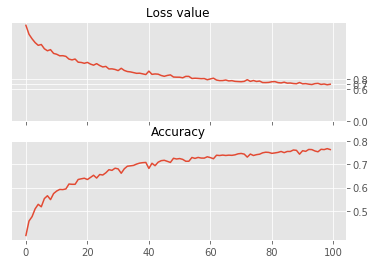

In [21]:
# Plot the training output

import pandas as pd 
records = pd.read_csv(modelname +'.csv') 
plt.figure() 
plt.subplot(211) 
plt.plot(records['val_loss']) 
plt.yticks([0.00,0.60,0.70,0.80]) 
plt.title('Loss value',fontsize=12) 
ax = plt.gca() 
ax.set_xticklabels([]) 
plt.subplot(212) 
plt.plot(records['val_acc']) 
plt.yticks([0.5,0.6,0.7,0.8]) 
plt.title('Accuracy',fontsize=12) 
plt.show()